# Explained variance demonstration

This notebook contains a visual example of explained variance and shows it's relationship to and calculation relative to R-squared.

## Notebook set-up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## 1. Data

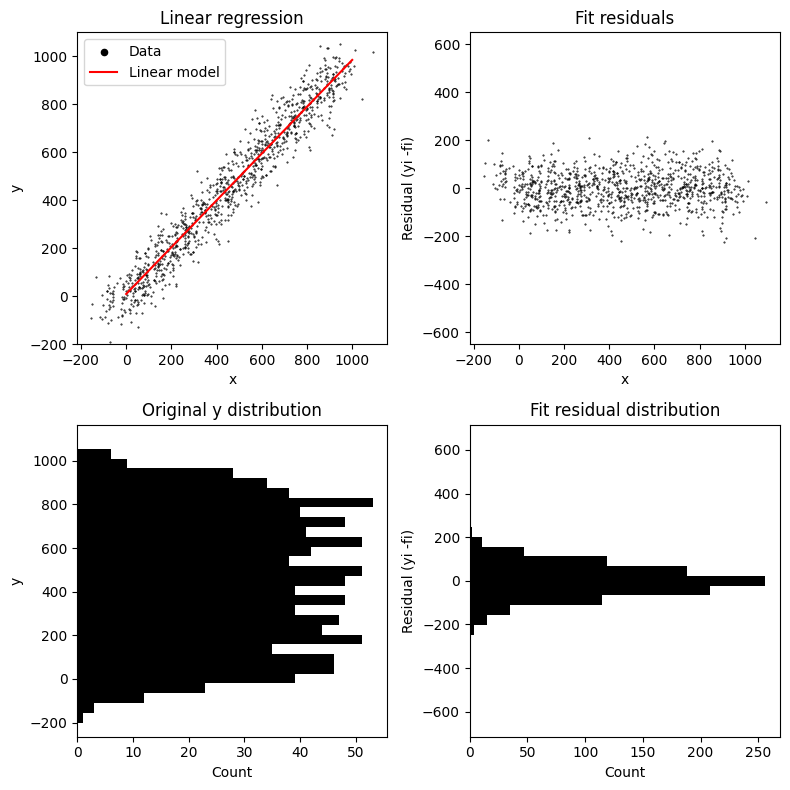

In [2]:
# Some linear data with noise
n=1000
noise_wdith=50
x=np.array(list(range(n))) + np.random.normal(-noise_wdith,noise_wdith,n)
y=np.array(list(range(n))) + np.random.normal(-noise_wdith,noise_wdith,n)

# Linear fit
linear_model=LinearRegression()
linear_model.fit(x.reshape(-1, 1), y)

# Predict uniform across uniform range for plotting
x_range=np.linspace(0,n)
y_linear=linear_model.predict(x_range.reshape(-1, 1))

# Make predictions for x
y_predicted=linear_model.predict(x.reshape(-1, 1))

# Fit residuals
y_residual=y - y_predicted

fig, axs=plt.subplots(2,2, figsize=(8,8))
axs=axs.flatten()

axs[0].set_title('Linear regression')
axs[0].scatter(x, y, s=0.2, color='black', label='Data')
axs[0].plot(x_range, y_linear, color='red', label='Linear model')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_ylim(-200, 1100)
axs[0].legend(loc='upper left', markerscale=10)

axs[1].set_title('Fit residuals')
axs[1].scatter(x, y_residual, s=0.2, color='black')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Residual (yi -fi)')
axs[1].set_ylim(-650, 650)

bins=np.linspace(-200, 1100, 30)
axs[2].set_title('Original y distribution')
axs[2].hist(y, color='black', bins=bins, orientation='horizontal')
axs[2].set_xlabel('Count')
axs[2].set_ylabel('y')

bins=np.linspace(-650, 650, 30)
axs[3].set_title('Fit residual distribution')
axs[3].hist(y_residual, color='black', bins=bins, orientation='horizontal')
axs[3].set_xlabel('Count')
axs[3].set_ylabel('Residual (yi -fi)')

fig.tight_layout()
fig.show()

In [3]:
y_var=np.var(y)
y_residual_var=np.var(y_residual)

print(f'Data variance: {y_var:.0f}, residual variance: {y_residual_var:.0f}')
print(f'Fraction of variance explained: {1-(y_residual_var/y_var):.3f}')

Data variance: 87513, residual variance: 5195
Fraction of variance explained: 0.941


In [4]:
sk_r2=r2_score(y, y_predicted)
print(f'Scikit-learn R-squared: {sk_r2:.3f}')

Scikit-learn R-squared: 0.941
